# Loading data

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.load('data/x_train.npy')
y_train = np.load('data/y_train.npy')
x_test = np.load('data/x_test.npy')
y_test = np.load('data/y_test.npy')

In [3]:
from __future__ import print_function
import numpy as np
from random import shuffle
import time
import csv
from PIL import Image
import os
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras import initializers
from keras.optimizers import SGD
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential,load_model,Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import *
from keras.callbacks import CSVLogger
from keras import callbacks
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import sklearn.metrics as sklm
import sys
sys.path.insert(0,'..')
from utils import lossprettifier

C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\tensorflow\python\f

In [4]:
# for reproducibility
np.random.seed(3768)

# use this environment flag to change which GPU to use 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"  # specify which GPU(s) to be used

#Get TensorFlow session
def get_session(): 
  config = tf.ConfigProto() 
  config.gpu_options.allow_growth = True 
  return tf.Session(config=config) 
  
# One hot encoding of labels 
def dense_to_one_hot(labels_dense,num_clases=4):
  return np.eye(num_clases)[labels_dense]

In [5]:
# Preparing training and test sets
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

In [6]:
#Image data generation for the training 
datagen = ImageDataGenerator(
               featurewise_center = False, 
               samplewise_center = False,  # set each sample mean to 0
               featurewise_std_normalization = True,  
               samplewise_std_normalization = False)  

datagen.fit(x_train) 
for i in range(len(x_test)):
      x_test[i] = datagen.standardize(x_test[i])

C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\keras_preprocessing\image\image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


# Unsupervised pretraining

In [7]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras import layers
from keras import models
from keras.models import *
from keras.layers import *
import tensorflow as tf

In [8]:
#CONV BLOCKS

input_shape = (224,224,3)
model = keras.Sequential()

#encoder

model.add(layers.Conv2D(2, (3, 3), activation='relu',padding='same',name='block1_conv1',kernel_initializer="he_normal",
                       input_shape=input_shape))
model.add(layers.Conv2D(2, (3, 3), activation='relu',padding='same',name='block1_conv2',kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

model.add(layers.Conv2D(4, (3, 3), activation='relu',padding='same',name='block2_conv1',kernel_initializer="he_normal"))
model.add(layers.Conv2D(4, (3, 3), activation='relu',padding='same',name='block2_conv2',kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',name='block3_conv1',kernel_initializer="he_normal"))
model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',name='block3_conv2',kernel_initializer="he_normal"))
model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',name='block3_conv3',kernel_initializer="he_normal"))
model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',name='block3_conv4',kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block4_conv1',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block4_conv2',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block4_conv3',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block4_conv4',kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block5_conv1',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block5_conv2',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block5_conv3',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block5_conv4',kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

#decoder

model.add(layers.UpSampling2D((2, 2), name='block5_up'))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block5_conv1_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block5_conv2_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block5_conv3_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(3, (3, 3), activation='sigmoid',padding='same',name='block5_conv4_dec',kernel_initializer="he_normal"))

model.add(layers.UpSampling2D((2, 2), name='block4_up'))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block4_conv1_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block4_conv2_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',name='block4_conv3_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(16, (3, 3), activation='sigmoid',padding='same',name='block4_conv4_dec',kernel_initializer="he_normal"))

model.add(layers.UpSampling2D((2, 2), name='block3_up'))
model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',name='block3_conv1_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',name='block3_conv2_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',name='block3_conv3_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(8, (3, 3), activation='relu',padding='same',name='block3_conv4_dec',kernel_initializer="he_normal"))

model.add(layers.UpSampling2D((2, 2), name='block2_up'))
model.add(layers.Conv2D(4, (3, 3), activation='relu',padding='same',name='block2_conv1_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(4, (3, 3), activation='relu',padding='same',name='block2_conv2_dec',kernel_initializer="he_normal"))

model.add(layers.UpSampling2D((2, 2), name='block1_up'))
model.add(layers.Conv2D(2, (3, 3), activation='relu',padding='same',name='block1_conv1_dec',kernel_initializer="he_normal"))
model.add(layers.Conv2D(3, (3, 3), activation='sigmoid',padding='same',name='block1_conv2_dec',kernel_initializer="he_normal"))
    
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 2)       56        
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 2)       38        
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 2)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 4)       76        
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 4)       148       
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 4)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 8)       

In [9]:
#Defining hyperparameters
batch_Size = 32
steps_Per_Epoch = 32
numEpochs = 50

#Instantating VGG19 model
#model = VGG19((224,224,3),classes=3) #VGG19_dense for revised VGG19, VGG19 for VGG19. Please pay attention to VGG16(), chnage the input shape and class number in VGG.py.

#Creating an optimizers
adaDelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.95, nesterov=True)
model.compile(optimizer = sgd , loss = 'mean_squared_error', metrics = ['accuracy'])

#Creating early stopping 
earlystop = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 50, verbose = 1, mode = 'auto', restore_best_weights = True)       

train_generator = datagen.flow(x_train, x_train, batch_size = batch_Size)
validation_generator = datagen.flow(x_valid, x_valid, batch_size = batch_Size)

# Model training
history = model.fit_generator(
    train_generator,
    steps_per_epoch = steps_Per_Epoch,
    validation_data = validation_generator, 
    validation_steps = 16,
    epochs = numEpochs,
    shuffle = True, 
    verbose = 1)


Epoch 1/50
32/32 [==============================] - 15s 478ms/step - loss: 19821.9171 - accuracy: 0.9649 - val_loss: 20567.0586 - val_accuracy: 0.9979
Epoch 2/50
32/32 [==============================] - 4s 118ms/step - loss: 19724.2783 - accuracy: 0.9962 - val_loss: 21474.5254 - val_accuracy: 0.9962
Epoch 3/50
32/32 [==============================] - 4s 119ms/step - loss: 19759.3819 - accuracy: 0.9967 - val_loss: 18750.2305 - val_accuracy: 0.9983
Epoch 4/50
32/32 [==============================] - 4s 132ms/step - loss: 19448.2738 - accuracy: 0.9971 - val_loss: 20355.6191 - val_accuracy: 0.9999
Epoch 5/50
32/32 [==============================] - 4s 119ms/step - loss: 19840.1760 - accuracy: 0.9969 - val_loss: 19920.3262 - val_accuracy: 0.9926
Epoch 6/50
32/32 [==============================] - 4s 120ms/step - loss: 19518.7372 - accuracy: 0.9996 - val_loss: 18261.2441 - val_accuracy: 0.9999
Epoch 7/50
32/32 [==============================] - 4s 117ms/step - loss: 19722.1815 - accuracy: 0

In [10]:
score, acc = model.evaluate(x_test, x_test, batch_size=batch_Size)
print("Accuracy:", acc)

1578/1578 [==============================] - 8s 5ms/step
Accuracy: 0.9994408488273621


In [11]:
# pruning decoders
for i in range(21):
    model.pop()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 2)       56        
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 2)       38        
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 2)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 4)       76        
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 4)       148       
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 4)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 8)        

C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


# Supervised training

In [12]:
x_train = np.load('data/x_train_undersampled.npy')
y_train = np.load('data/y_train_undersampled.npy')
x_test = np.load('data/x_test_undersampled.npy')
y_test = np.load('data/y_test_undersampled.npy')

# Preparing training and test sets
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
y_train = dense_to_one_hot(y_train,num_clases=3)
y_valid= dense_to_one_hot(y_valid,num_clases=3)

#Image data generation for the training 
datagen = ImageDataGenerator(
               featurewise_center = False, 
               samplewise_center = False,  # set each sample mean to 0
               featurewise_std_normalization = True,  
               samplewise_std_normalization = False)  

datagen.fit(x_train) 
for i in range(len(x_test)):
      x_test[i] = datagen.standardize(x_test[i])

In [13]:
# LABELED TRAINING
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu', name='fc1'))
model.add(layers.Dropout(0.5, name="dropout_1"))
model.add(layers.Dense(128, activation='relu', name='fc2'))
model.add(Dense(3, activation = "softmax", name='predictions'))
    
model.summary()

for layer in model.layers[:21]: #freezing conv layers
    layer.trainable = False

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 2)       56        
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 2)       38        
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 2)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 4)       76        
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 4)       148       
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 4)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 8)        

In [14]:
batch_Size = 32
steps_Per_Epoch = 32
numEpochs = 200

#Creating an optimizers
adaDelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.95, nesterov=True)
model.compile(optimizer = sgd , loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Creating early stopping 
earlystop = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 50, verbose = 1, mode = 'auto', restore_best_weights = True)       

train_generator = datagen.flow(x_train, y_train, batch_size = batch_Size)
validation_generator = datagen.flow(x_valid, y_valid, batch_size = batch_Size)

# Model training
history = model.fit_generator(
    train_generator,
    steps_per_epoch = steps_Per_Epoch,
    validation_data = validation_generator, 
    validation_steps = 16,
    epochs = numEpochs,
    shuffle = True, 
    verbose = 1)

Epoch 1/200
32/32 [==============================] - 52s 2s/step - loss: 1.1125 - accuracy: 0.3291 - val_loss: 1.0662 - val_accuracy: 0.3433
Epoch 2/200
32/32 [==============================] - 1s 31ms/step - loss: 1.0687 - accuracy: 0.4339 - val_loss: 1.0188 - val_accuracy: 0.4451
Epoch 3/200
32/32 [==============================] - 1s 29ms/step - loss: 1.0323 - accuracy: 0.4766 - val_loss: 0.9105 - val_accuracy: 0.5768
Epoch 4/200
32/32 [==============================] - 1s 30ms/step - loss: 1.0008 - accuracy: 0.4912 - val_loss: 0.9304 - val_accuracy: 0.6687
Epoch 5/200
32/32 [==============================] - 1s 33ms/step - loss: 0.9318 - accuracy: 0.5664 - val_loss: 0.9835 - val_accuracy: 0.6068
Epoch 6/200
32/32 [==============================] - 1s 30ms/step - loss: 0.9226 - accuracy: 0.5847 - val_loss: 0.6271 - val_accuracy: 0.6727
Epoch 7/200
32/32 [==============================] - 1s 33ms/step - loss: 0.9039 - accuracy: 0.5771 - val_loss: 0.8032 - val_accuracy: 0.7066
Epoch 8

32/32 [==============================] - 1s 37ms/step - loss: 0.9700 - accuracy: 0.5146 - val_loss: 0.8791 - val_accuracy: 0.6866
Epoch 59/200
32/32 [==============================] - 1s 29ms/step - loss: 0.9691 - accuracy: 0.4951 - val_loss: 0.8240 - val_accuracy: 0.5828
Epoch 60/200
32/32 [==============================] - 1s 30ms/step - loss: 1.0186 - accuracy: 0.4297 - val_loss: 0.9335 - val_accuracy: 0.5589
Epoch 61/200
32/32 [==============================] - 1s 30ms/step - loss: 0.9885 - accuracy: 0.4652 - val_loss: 0.8957 - val_accuracy: 0.5150
Epoch 62/200
32/32 [==============================] - 1s 30ms/step - loss: 1.0403 - accuracy: 0.3994 - val_loss: 0.8708 - val_accuracy: 0.5489
Epoch 63/200
32/32 [==============================] - 1s 29ms/step - loss: 1.0026 - accuracy: 0.4404 - val_loss: 0.8887 - val_accuracy: 0.5589
Epoch 64/200
32/32 [==============================] - 1s 30ms/step - loss: 1.0131 - accuracy: 0.4515 - val_loss: 0.9429 - val_accuracy: 0.5449
Epoch 65/200

32/32 [==============================] - 1s 32ms/step - loss: 0.9102 - accuracy: 0.5742 - val_loss: 0.8198 - val_accuracy: 0.6786
Epoch 116/200
32/32 [==============================] - 1s 30ms/step - loss: 0.8934 - accuracy: 0.5955 - val_loss: 0.7816 - val_accuracy: 0.6727
Epoch 117/200
32/32 [==============================] - 1s 30ms/step - loss: 0.9505 - accuracy: 0.5400 - val_loss: 0.8363 - val_accuracy: 0.7206
Epoch 118/200
32/32 [==============================] - 1s 30ms/step - loss: 0.8628 - accuracy: 0.6035 - val_loss: 0.6851 - val_accuracy: 0.7226
Epoch 119/200
32/32 [==============================] - 1s 33ms/step - loss: 0.8925 - accuracy: 0.5713 - val_loss: 0.8131 - val_accuracy: 0.7405
Epoch 120/200
32/32 [==============================] - 1s 30ms/step - loss: 0.9086 - accuracy: 0.5908 - val_loss: 0.8494 - val_accuracy: 0.6567
Epoch 121/200
32/32 [==============================] - 1s 30ms/step - loss: 0.9058 - accuracy: 0.5840 - val_loss: 0.7660 - val_accuracy: 0.7126
Epoch 

Epoch 172/200
32/32 [==============================] - 1s 32ms/step - loss: 1.0103 - accuracy: 0.4932 - val_loss: 0.8349 - val_accuracy: 0.6547
Epoch 173/200
32/32 [==============================] - 1s 30ms/step - loss: 0.9801 - accuracy: 0.5049 - val_loss: 1.0023 - val_accuracy: 0.5968
Epoch 174/200
32/32 [==============================] - 1s 30ms/step - loss: 0.9603 - accuracy: 0.5371 - val_loss: 0.7699 - val_accuracy: 0.6886
Epoch 175/200
32/32 [==============================] - 1s 30ms/step - loss: 0.9264 - accuracy: 0.5752 - val_loss: 0.9173 - val_accuracy: 0.7046
Epoch 176/200
32/32 [==============================] - 1s 31ms/step - loss: 0.9665 - accuracy: 0.5459 - val_loss: 0.8569 - val_accuracy: 0.5948
Epoch 177/200
32/32 [==============================] - 1s 36ms/step - loss: 0.9811 - accuracy: 0.5152 - val_loss: 0.8643 - val_accuracy: 0.6607
Epoch 178/200
32/32 [==============================] - 1s 30ms/step - loss: 0.9131 - accuracy: 0.5645 - val_loss: 0.7102 - val_accuracy:

In [15]:
y_test_oh = dense_to_one_hot(y_test, num_clases=3)

# visualizing losses and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']

#Observing the losses but can be commented out as it's not mandatory 
reporter = lossprettifier.LossPrettifier(show_percentage=True)

for i in range(numEpochs-1):
    reporter(epoch=i, LossA = train_loss[i], LossAB = val_loss[i])

# Model evaluation 
score, acc = model.evaluate(x_test, y_test_oh, batch_size=batch_Size)
print("Accuracy:", acc)

Epoch     0 | LossA: 1.11(+0.00%) 	| LossAB: 1.07(+0.00%) 	
Epoch     1 | LossA: 1.07(-3.93%) ▼	| LossAB: 1.02(-4.45%) ▼	
Epoch     2 | LossA: 1.03(-3.41%) ▼	| LossAB: 0.91(-10.63%) ▼	
Epoch     3 | LossA: 1.00(-3.05%) ▼	| LossAB: 0.93(+2.18%) ▲	
Epoch     4 | LossA: 0.93(-6.90%) ▼	| LossAB: 0.98(+5.70%) ▲	
Epoch     5 | LossA: 0.92(-0.96%) ▼	| LossAB: 0.63(-36.23%) ▼	
Epoch     6 | LossA: 0.90(-2.05%) ▼	| LossAB: 0.80(+28.07%) ▲	
Epoch     7 | LossA: 0.87(-3.81%) ▼	| LossAB: 0.82(+1.98%) ▲	
Epoch     8 | LossA: 0.89(+2.48%) ▲	| LossAB: 0.90(+10.09%) ▲	
Epoch     9 | LossA: 0.87(-2.63%) ▼	| LossAB: 0.80(-11.35%) ▼	
Epoch    10 | LossA: 0.83(-3.79%) ▼	| LossAB: 0.86(+7.60%) ▲	
Epoch    11 | LossA: 0.83(-0.41%) ▼	| LossAB: 0.91(+6.19%) ▲	
Epoch    12 | LossA: 0.82(-1.02%) ▼	| LossAB: 0.45(-50.72%) ▼	
Epoch    13 | LossA: 0.82(+0.26%) ▲	| LossAB: 0.69(+52.36%) ▲	
Epoch    14 | LossA: 0.84(+2.41%) ▲	| LossAB: 0.76(+11.11%) ▲	
Epoch    15 | LossA: 0.85(+0.75%) ▲	| LossAB: 0.45(-40.88%) ▼	
E

300/300 [==============================] - 0s 1ms/step
Accuracy: 0.5333333611488342


In [16]:
y_pred = model.predict(x_test)
y_pred = y_pred.reshape(len(y_test), 3)
y_pred = np.argmax(y_pred, axis=1)

#Print class-wise classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.13      0.23       100
           1       0.66      0.59      0.62       100
           2       0.44      0.88      0.59       100

    accuracy                           0.53       300
   macro avg       0.70      0.53      0.48       300
weighted avg       0.70      0.53      0.48       300



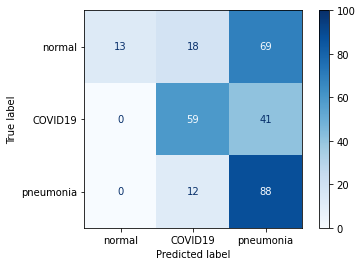

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array(['normal', 'COVID19', 'pneumonia']))
disp.plot(cmap='Blues') 
disp.ax_.get_images()[0].set_clim(0, 100)